In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Make plots appear in notebook
%matplotlib inline

In [2]:
# Load CSV
df = pd.read_csv("data/Film_Dataset.csv")

# Check first 5 rows
df.head()


,Film_Name,Release_Date,Category,Language,Viewer_Rate,Number_of_Views,Viewing_Month
0,Chennai Express,9/12/2021,Romance,Hindi,4.5,36395,2022-09
1,Mountain Trail,4/27/2020,Comedy,English,3.5,93162,2021-07
2,Eternal Hope,7/4/2020,Romance,English,4.6,98663,2021-04
3,Seoul Heartbeat,4/17/2020,Comedy,English,4.1,112635,2020-07
4,Shadow Pact,2/24/2022,Documentary,English,4.3,29496,2023-05


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Film_Name        460 non-null    object 
 1   Release_Date     460 non-null    object 
 2   Category         460 non-null    object 
 3   Language         460 non-null    object 
 4   Viewer_Rate      460 non-null    float64
 5   Number_of_Views  460 non-null    int64  
 6   Viewing_Month    460 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 25.3+ KB


,Viewer_Rate,Number_of_Views
count,460.000000,460.000000
mean,4.220217,94964.213043
std,0.398915,35857.934071
min,3.500000,25397.000000
25%,3.900000,69759.500000
50%,4.200000,94234.000000
75%,4.600000,116376.500000
max,4.900000,229647.000000


In [4]:
# Convert dates
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Viewing_Month'] = pd.to_datetime(df['Viewing_Month'], errors='coerce')

# Remove duplicates
df = df.drop_duplicates()

# Remove missing values
df = df.dropna().reset_index(drop=True)


In [5]:
df['Viewing_Month'].dt.year.value_counts()
df = df[df['Viewing_Month'].dt.year != 2026].reset_index(drop=True)


In [6]:
#create a unique id for remove movies that are duplicated
df['Movie_ID'] = (df['Film_Name'] + df['Release_Date'].astype(str) +
                  df['Category'] + df['Language']).apply(lambda x: hash(x))

df[['Film_Name','Release_Date','Category','Language','Movie_ID']].head()


,Film_Name,Release_Date,Category,Language,Movie_ID
0,Chennai Express,2021-09-12,Romance,Hindi,3693033536285550718
1,Mountain Trail,2020-04-27,Comedy,English,3134804340601401917
2,Eternal Hope,2020-07-04,Romance,English,-1713837298350457392
3,Seoul Heartbeat,2020-04-17,Comedy,English,8192673702566286090
4,Shadow Pact,2022-02-24,Documentary,English,-462396339096206197


In [7]:
today = pd.Timestamp.today()

# Days since release
df['days_since_release'] = (today - df['Release_Date']).dt.days
df['days_since_release'] = df['days_since_release'].replace(0, 1)

# Months since release
df['months_since_release'] = df['days_since_release'] / 30

# Trending score = views per month
df['trending_score'] = df['Number_of_Views'] / df['months_since_release']


In [8]:
df.isnull().sum()
df.duplicated().sum()
df.describe()
df['Category'].value_counts()
df['Language'].value_counts()


Language
Hindi        68
Tamil        60
Chinese      49
Sinhala      48
Malayalam    48
English      47
Taiwanese    39
Pakistani    39
French       15
Spanish      13
Japanese     10
Korean        9
Name: count, dtype: int64

In [9]:
df.sort_values('Number_of_Views', ascending=False).head(10)


,Film_Name,Release_Date,Category,Language,Viewer_Rate,Number_of_Views,Viewing_Month,Movie_ID,days_since_release,months_since_release,trending_score
116,Lahore Nights,2024-07-10,Romance,Hindi,4.1,229647,2025-02-01,-7508316702706197923,519,17.300000,13274.393064
329,Seoul Heartbeat,2023-08-25,Romance,Chinese,4.6,226835,2024-02-01,-5805042990881334873,839,27.966667,8110.905840
152,Crimson Tide,2021-01-01,Romance,Hindi,4.3,203753,2021-02-01,9069790627908095234,1805,60.166667,3386.476454
327,Mirror Maze,2021-05-21,Romance,Chinese,4.6,194188,2022-12-01,8530241968475729286,1665,55.500000,3498.882883
324,Chennai Express,2020-12-28,Action/Sci-Fi,Chinese,4.7,191231,2022-07-01,3009402766710181626,1809,60.300000,3171.326700
365,Lahore Nights,2020-11-20,Action/Sci-Fi,Chinese,4.5,184630,2022-07-01,-5450699250816144303,1847,61.566667,2998.863021
131,Desert Trek,2024-03-31,Action/Sci-Fi,Hindi,3.7,180489,2025-07-01,-8993065590610573741,620,20.666667,8733.338710
38,Seoul Heartbeat,2020-10-18,Romance,English,4.5,179123,2022-02-01,3109920826204716421,1880,62.666667,2858.345745
275,Mirror Maze,2024-02-19,Romance,Sinhala,4.7,173789,2024-02-01,-52134815455508092,661,22.033333,7887.549168
19,Lahore Nights,2021-08-16,Romance,English,4.2,171661,2023-02-01,2533436942973900917,1578,52.600000,3263.517110


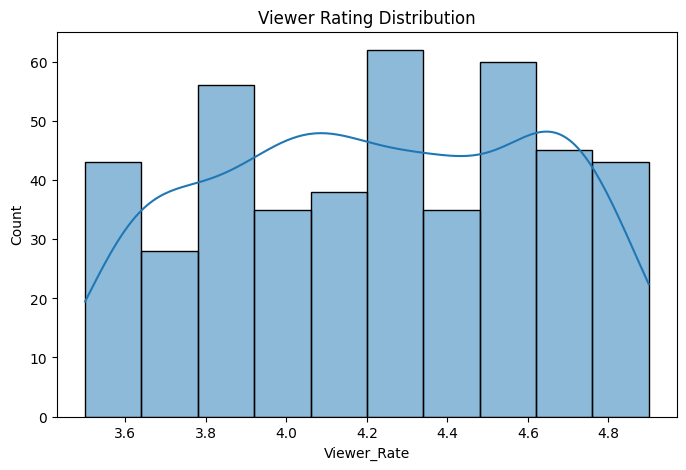

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Viewer_Rate'], bins=10, kde=True)
plt.title("Viewer Rating Distribution")
plt.show()


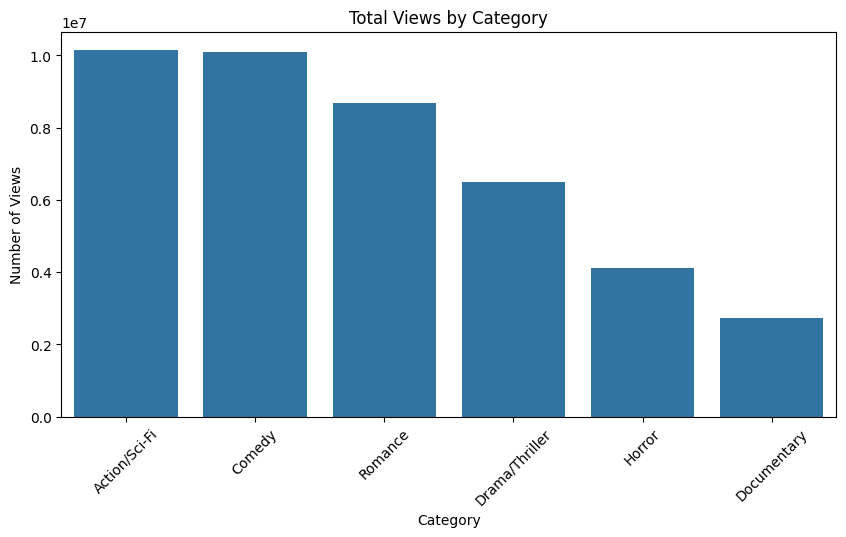

In [11]:
category_views = df.groupby('Category')['Number_of_Views'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=category_views.index, y=category_views.values)
plt.xticks(rotation=45)
plt.title("Total Views by Category")
plt.ylabel("Number of Views")
plt.show()


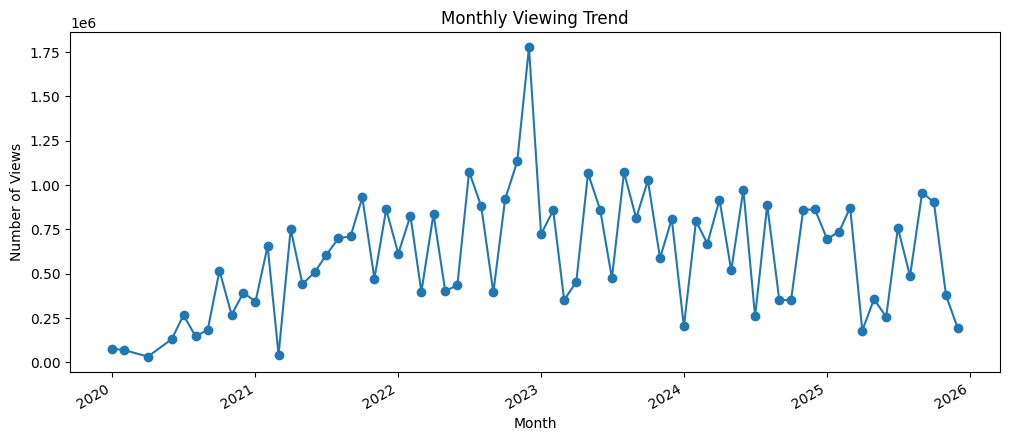

In [12]:
monthly_views = df.groupby('Viewing_Month')['Number_of_Views'].sum()

plt.figure(figsize=(12,5))
monthly_views.plot(kind='line', marker='o')
plt.title("Monthly Viewing Trend")
plt.xlabel("Month")
plt.ylabel("Number of Views")
plt.show()


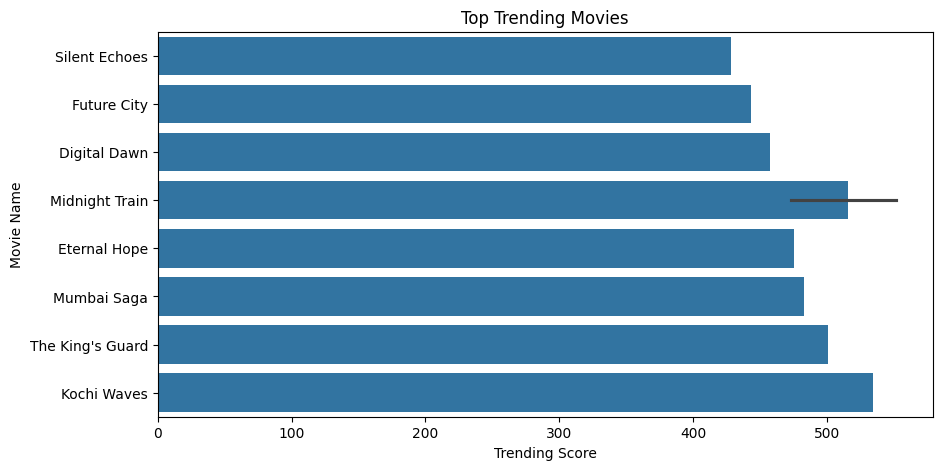

In [13]:
top_trending = df.sort_values('trending_score', ascending=True).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='trending_score', y='Film_Name', data=top_trending)
plt.title("Top Trending Movies")
plt.xlabel("Trending Score")
plt.ylabel("Movie Name")
plt.show()


In [14]:
fig = px.pie(df, names='Category', values='Number_of_Views', title='Views by Category')
fig.show()


In [15]:
df.to_csv("data/Film_Dataset_Cleaned.csv", index=False)
print("Cleaned dataset saved!")


Cleaned dataset saved!
